In [1]:
import pandas as pd
from matplotlib import rc as rc
from matplotlib import pyplot as plt
import numpy as np 

dataset_name = "wine"
K = 50
n_inits = 100

# Load the CSV file
df_global = pd.read_csv(f'C:\\Users\\PAPASOFT INC\\Documents\\GitHub\\global-kernel-k-means-pp\\Results\\{dataset_name}\\rbf\\{n_inits}\\GlobalKernelKMeans_Dataset_{dataset_name}_Kernel_rbf_K_{K}_Inits_{n_inits}_Results.csv')
df_global_pp_batch = pd.read_csv(f'C:\\Users\\PAPASOFT INC\\Documents\\GitHub\\global-kernel-k-means-pp\\Results\\{dataset_name}\\rbf\\{n_inits}\\GlobalKernelKMeans_Dataset_{dataset_name}_Sampling_batch_Kernel_rbf_K_50_Inits_{n_inits}_Results.csv')
df_global_pp_sequential = pd.read_csv(f'C:\\Users\\PAPASOFT INC\\Documents\\GitHub\\global-kernel-k-means-pp\\Results\\{dataset_name}\\rbf\\{n_inits}\\GlobalKernelKMeans_Dataset_{dataset_name}_Sampling_sequential_Kernel_rbf_K_50_Inits_{n_inits}_Results.csv')
df_random = pd.read_csv(f'C:\\Users\\PAPASOFT INC\\Documents\\GitHub\\global-kernel-k-means-pp\\Results\\{dataset_name}\\rbf\\{n_inits}\\KernelKMeans_Dataset_{dataset_name}_Init_random_Kernel_rbf_K_50_Inits_{n_inits}_Results.csv')
df_pp = pd.read_csv(f'C:\\Users\\PAPASOFT INC\\Documents\\GitHub\\global-kernel-k-means-pp\\Results\\{dataset_name}\\rbf\\{n_inits}\\KernelKMeans_Dataset_{dataset_name}_Init_k-means++_Kernel_rbf_K_50_Inits_{n_inits}_Results.csv')
#df_forgy = pd.read_csv(f'C:\\Users\\PAPASOFT INC\\Documents\\GitHub\\global-kernel-k-means-pp\\Results\\{dataset_name}\\rbf\\{n_inits}\\KernelKMeans_Dataset_{dataset_name}_Init_forgy_Kernel_rbf_K_50_Inits_{n_inits}_Results.csv')

In [2]:
def percentage_error(base_mse, to_compare_mse):
    return ((to_compare_mse - base_mse) / (base_mse)) * 100

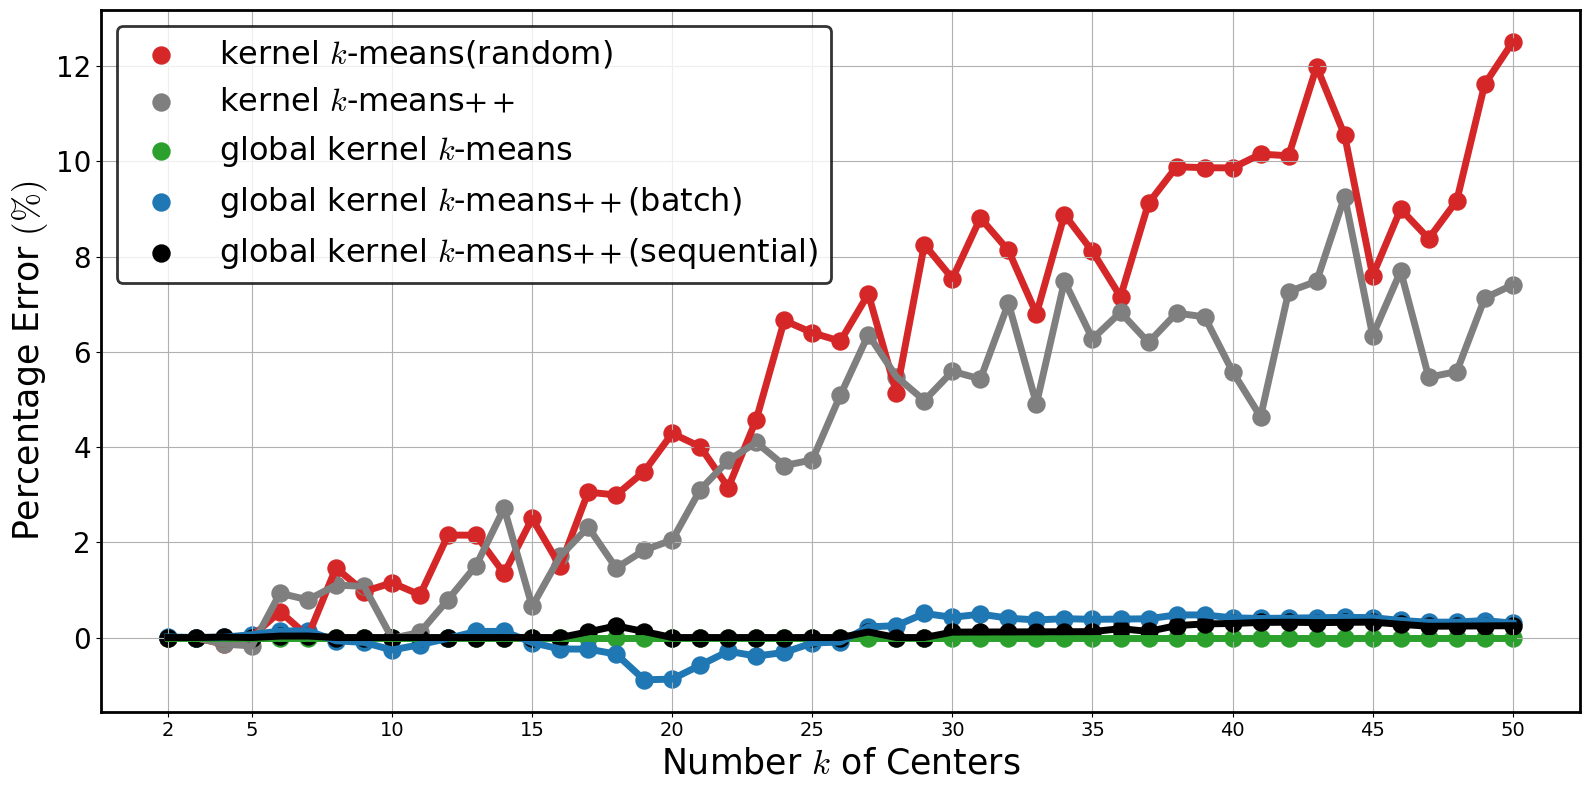

In [3]:
rc('mathtext', fontset = 'cm')
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
fig, ax1 = plt.subplots(figsize=(16, 8),)


#fig.suptitle("Comparison of k-means seeding algorithms", fontsize=20)

centroids_range = np.arange(2, 51)
# ax1 setting
#ax1.set_yscale("log", base=10)
ax1.set_xticks(ticks=centroids_range)

#ax1.xaxis.set_ticklabels([])
#plt.ylim([-100, 0.9])

for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2.0)

linestyle = 'solid'
linewidth = 5
markersize = 150

# Global k-means

#ax1.plot(centroids_range, percentage_error(df_global['MSE'], df_forgy['MSE']), linestyle=linestyle, linewidth=linewidth, c='tab:brown')
#ax1.scatter(centroids_range, percentage_error(df_global['MSE'], df_forgy['MSE']), label="kernel $k$-means(forgy)", s=markersize,c='tab:brown')

ax1.plot(centroids_range, percentage_error(df_global['MSE'], df_random['MSE']), linestyle=linestyle, linewidth=linewidth, c="tab:red")
ax1.scatter(centroids_range, percentage_error(df_global['MSE'], df_random['MSE']), label = "kernel $k$-means(random)", s=markersize, c="tab:red")

ax1.plot(centroids_range, percentage_error(df_global['MSE'], df_pp['MSE']), linestyle=linestyle, linewidth=linewidth, color="tab:gray")
ax1.scatter(centroids_range, percentage_error(df_global['MSE'], df_pp['MSE']), label="kernel $k$-means$\mathbb{++}$", c="tab:gray", s=markersize)

ax1.plot(centroids_range, percentage_error(df_global['MSE'], df_global['MSE']), linestyle=linestyle, linewidth=linewidth, c="tab:green")
ax1.scatter(centroids_range, percentage_error(df_global['MSE'], df_global['MSE']), label="global kernel $k$-means", s=markersize, c="tab:green")

ax1.plot(centroids_range, percentage_error(df_global['MSE'], df_global_pp_batch['MSE']), linestyle=linestyle, linewidth=linewidth, c="tab:blue")
ax1.scatter(centroids_range, percentage_error(df_global['MSE'], df_global_pp_batch['MSE']), label="global kernel $k$-means$\mathbb{++}$(batch)", c="tab:blue", s=markersize)

ax1.plot(centroids_range, percentage_error(df_global['MSE'], df_global_pp_sequential['MSE']), linestyle=linestyle, linewidth=linewidth, c="black")
ax1.scatter(centroids_range, percentage_error(df_global['MSE'], df_global_pp_sequential['MSE']), label="global kernel $k$-means$\mathbb{++}$(sequential)", c="black", s=markersize)

"""
# Global k-means++ batch
#if gl_km_pp:

ax1.plot(centroids_range, cl_df['random'], linestyle=linestyle, linewidth=linewidth,c="tab:brown")
ax1.scatter(centroids_range, cl_df['random'], label="random", s=markersize, c="tab:brown")

# Global k-means++ sequential
if gl_km_pp_cand:
    ax1.plot(centroids_range, cl_df["Gl k-means$++$ sequential"], linestyle=linestyle, linewidth=linewidth, c="black")
    ax1.scatter(centroids_range, cl_df["Gl k-means$++$ sequential"], label="global $k$-means$\mathbb{++}$(sequential)", c="black", s=markersize)


# Fast Global k-means
if gl_fast:
    ax1.plot(centroids_range, cl_df["Fast global"], linestyle=linestyle, linewidth=linewidth, c='tab:orange')
    ax1.scatter(centroids_range, cl_df["Fast global"], label="fast global $k$-means", s=markersize,c='tab:orange')

# k-means++
if km_pp:
    ax1.plot(centroids_range, cl_df["k-means$++$"], linestyle=linestyle, linewidth=linewidth, c="tab:red")
    ax1.scatter(centroids_range, cl_df["k-means$++$"], label="$k$-means$\mathbb{++}$", s=markersize, c="tab:red")

# random k-means
if random:
    ax1.plot(centroids_range, cl_df['random'], linestyle=linestyle, linewidth=linewidth,c="tab:brown")
    ax1.scatter(centroids_range, cl_df['random'], label="percentage_error(df_global['MSE'], df_global_pp_sequential['MSE']),", s=markersize, c="tab:brown")
"""

ax1.set_ylabel("Percentage Error $(\%)$", fontsize=25)
ax1.grid(True)
# get the legend object
leg1 = ax1.legend(loc="upper left", framealpha=0.8, fontsize=23)
leg1.get_frame().set_linewidth(2.0)
leg1.get_frame().set_edgecolor("black")

plt.xticks(fontsize=14)
plt.yticks(fontsize=20)
xticks = list(np.arange(5, 51, 5))
plt.xticks([2] + xticks)

plt.xlabel("Number $k$ of Centers", fontsize=25)
plt.tight_layout()
plt.savefig(f'C:\\Users\\PAPASOFT INC\\Documents\\GitHub\\global-kernel-k-means-pp\\Results\\{dataset_name}\\rbf\\{n_inits}\\Dataset_{dataset_name}_Kernel_rbf_Algorithms_Comparison_Graph.png')
plt.show()